In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, confusion_matrix

In [2]:
data = pd.read_csv('dataset.csv')

print(data.head())

                                                 url  length_url  \
0  http://tlook-off365-signin.el.r.appspot.com/ap...          64   
1  https://www.inc.com/encyclopedia/local-area-ne...          62   
2  https://www.support-appleld.com.secureupdate.d...          81   
3  http://www.alpha-east.de/wp-folder/folder/nw/d...          53   
4       https://mineiro.co.jp/doc/dir/ejaya/laco.php          44   

   length_hostname  is_ip  dots_qty  hyphens_qty  at_qty  is_www  is_https  \
0               36      0         5            2       0       0         1   
1               11      0         3            3       0       1         0   
2               54      1         5            1       0       1         0   
3               17      0         3            2       0       1         1   
4               13      0         3            0       0       0         0   

   is_tld  ...  suspicious_top_level_domain  qty_hyperlinks  \
0     0.0  ...                            0              22

In [3]:
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

X = data.drop(columns=['url', 'status'])
y = data['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 8913
Размер тестовой выборки: 2229


In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)

Точность модели: 0.9242
Отчет о классификации:
              precision    recall  f1-score   support

           1       0.92      0.93      0.93      1131
           2       0.93      0.92      0.92      1098

    accuracy                           0.92      2229
   macro avg       0.92      0.92      0.92      2229
weighted avg       0.92      0.92      0.92      2229

Матрица путаницы:
[[1052   79]
 [  90 1008]]


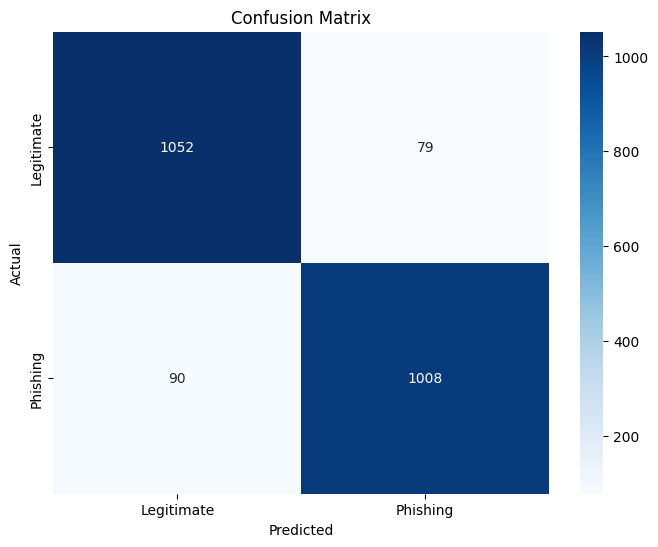

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

print("Матрица путаницы:")
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
import pandas as pd

results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

In [9]:
results_df.to_csv('model_predictions.csv', index=False)

In [10]:
from google.colab import files

files.download('model_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [12]:
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>